In [2]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#Importar datos
quien = pd.read_excel('Quien.xlsx')
quien.head()

,No.,Personaje,Sexo,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,Alejandro,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,No,NO,SI,NO,SI,SI,NO
1,2,Alfredo,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,No,SI,NO,SI,SI,SI,NO
2,3,Ana,Mujer,NO,NO,NO,SÍ,NO,NO,NO,NO,NO,SI,No,SI,NO,NO,NO,NO,SI
3,4,Anita,Mujer,NO,NO,NO,NO,SÍ,NO,NO,SÍ,NO,SI,No,SI,SI,SI,NO,NO,NO
4,5,Bernardo,Hombre,NO,NO,SÍ,NO,NO,NO,NO,NO,NO,SI,No,SI,NO,NO,SI,SI,SI


In [6]:
#Analizar datos
quien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   No.                                             26 non-null     int64 
 1   Personaje                                       26 non-null     object
 2   Sexo                                            26 non-null     object
 3   Vello Facial                                    26 non-null     object
 4   Anteojos                                        26 non-null     object
 5   Sombrero                                        26 non-null     object
 6   Aros?                                           26 non-null     object
 7   Tiene Rubor?                                    26 non-null     object
 8   Barba?                                          26 non-null     object
 9   Es pelado?                                      26 non-n

In [8]:
#Obtener las dimensiones de la lista 
quien.shape

(26, 20)

In [11]:
#Convertir a mayuscula la columna que no esta con el formato correcto 
quien['Se parece a Altamira?'] = quien['Se parece a Altamira?'].str.upper()
quien.head()

,No.,Personaje,Sexo,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,Alejandro,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,NO,SI,SI,NO
1,2,Alfredo,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,SI,SI,SI,NO
2,3,Ana,Mujer,NO,NO,NO,SÍ,NO,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,SI
3,4,Anita,Mujer,NO,NO,NO,NO,SÍ,NO,NO,SÍ,NO,SI,NO,SI,SI,SI,NO,NO,NO
4,5,Bernardo,Hombre,NO,NO,SÍ,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,NO,SI,SI,SI


In [14]:
#Reemplazar los si con acentación por uno sin tilde
quien = quien.replace('SÍ','SI')
quien.head()

,No.,Personaje,Sexo,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,Alejandro,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,NO,SI,SI,NO
1,2,Alfredo,Hombre,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,SI,SI,SI,NO
2,3,Ana,Mujer,NO,NO,NO,SI,NO,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,SI
3,4,Anita,Mujer,NO,NO,NO,NO,SI,NO,NO,SI,NO,SI,NO,SI,SI,SI,NO,NO,NO
4,5,Bernardo,Hombre,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,NO,SI,SI,SI


In [16]:
#Convertir SI =1  y NO = 0
quien = quien.replace('SI',1)
quien = quien.replace('NO',0)
quien.head()

,No.,Personaje,Sexo,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,Alejandro,Hombre,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,2,Alfredo,Hombre,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0
2,3,Ana,Mujer,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,4,Anita,Mujer,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0
4,5,Bernardo,Hombre,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1


In [18]:
#Dividir el dataset en 2: uno para el sexo y el otro para la respuesta
respuesta_datos = quien.iloc[0:24,3:20]
sexo_datos = quien.iloc[0:24,2:3]
print(respuesta_datos)

    Vello Facial  Anteojos  Sombrero  Aros?  Tiene Rubor?  Barba?  Es pelado?  \
0              1         0         0      0             0       0           0   
1              1         0         0      0             0       0           0   
2              0         0         0      1             0       0           0   
3              0         0         0      0             1       0           0   
4              0         0         1      0             0       0           0   
5              1         0         0      0             0       0           0   
6              0         1         1      1             0       0           0   
7              1         0         0      0             0       1           0   
8              0         0         1      0             0       0           0   
9              1         0         0      0             1       1           0   
10             0         0         0      0             0       0           1   
11             1         0  

In [19]:
print(sexo_datos)

      Sexo
0   Hombre
1   Hombre
2    Mujer
3    Mujer
4   Hombre
5   Hombre
6    Mujer
7   Hombre
8   Hombre
9   Hombre
10  Hombre
11  Hombre
12  Hombre
13  Hombre
14   Mujer
15  Hombre
16  Hombre
17  Hombre
18  Hombre
19  Hombre
20  Hombre
21  Hombre
22   Mujer
23  Hombre


In [20]:
#Valores de x prueba, y entrenamiento
X = respuesta_datos.to_numpy()
Y = sexo_datos.to_numpy()

In [21]:
#Datos de prueba para calcular el sexo
X_test = quien.iloc[24:26, 3:20].to_numpy()

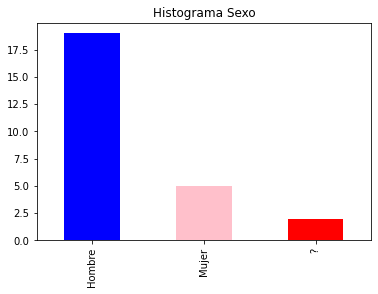

In [24]:
#Predicción datos faltantes
quien.Sexo.value_counts().plot(kind = 'bar', color = ['blue','pink','red'])
plt.title('Histograma Sexo')
plt.show()

In [26]:
#APlicación de algoritmos de maquine learnig

#Arboles de decisión
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X,Y)
DT_predict = DT.predict(X_test)
print('Predicción por árbol de decisión: ', DT_predict)

Predicción por árbol de decisión:  ['Hombre' 'Hombre']


In [28]:
# Probabilidad de éxito por árbol de decisión 
DT_score = round(DT.score(X,Y),4)
print('Score: ', DT_score)

Score:  1.0


In [29]:
#RandomForestClassifier

RFC = RandomForestClassifier() 
RFC.fit(X,Y)
RFC_prediction = RFC.predict(X_test)
print("Random Forest: ",RFC_prediction)

<ipython-input-29-a168cf15312e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X,Y)


Random Forest:  ['Hombre' 'Hombre']


In [30]:
#Score predicción Random Forest
RFC_score = round(RFC.score(X,Y), 4)
print('Score: ', RFC_score)

Score:  1.0


In [31]:
#SVC
SVC_df = SVC()
SVC_df.fit(X,Y)
SVC_prediction = SVC_df.predict(X_test)
print('SVC: ', SVC_prediction)

SVC:  ['Hombre' 'Hombre']


C:\Users\jllan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
#Score SVC
SVC_score = round(SVC_df.score(X,Y),4)
print('Score: ', SVC_score)

Score:  0.9167


In [33]:
#LogisticRegression
LR = LogisticRegression()
LR.fit(X,Y)
LR_prediction = LR.predict(X_test)
print("Regression logistic: ", LR_prediction)

Regression logistic:  ['Hombre' 'Hombre']


C:\Users\jllan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
# Score predicción por Regresión Lineal
LR_score= round(LR.score(X, Y), 4)
print('Score: ', LR_score)

Score:  0.9167
